In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Load the data
file_path = "../flood_tool/resources/postcodes_labelled.csv"
data = pd.read_csv(file_path)

# Adding unlabelled and missing postcode data to the merged_data
unlabelled = pd.read_csv("../flood_tool/example_data/postcodes_unlabelled.csv")
missing_postcode_data = pd.read_csv("../flood_tool/example_data/postcodes_missing_data.csv")

merged_data = pd.concat([data, unlabelled, missing_postcode_data], ignore_index=True)

data = merged_data

In [52]:
# # Adding headcounts to numerical columns
# headcounts = pd.read_csv("../flood_tool/resources/headcount_data.csv")

# # Renaming column 'total' to 'headcount'
# headcounts = headcounts.rename(columns={'Total': 'headcount'})

# headcounts

In [53]:
# duplicate
data.duplicated().sum()

# drop duplicates
data.drop_duplicates(inplace=True)

data.duplicated().sum() 

np.int64(0)

In [54]:
# Number of each value in each column
catagorical_columns = ['soilType', 'nearestWatercourse', 'localAuthority']
for i in catagorical_columns:
    print(data[i].value_counts(), '\n')

soilType
Unsurveyed/Urban    54429
Luvisols            10529
Cambisols            8572
Planosols            4995
Leptosols            3054
Gleysols             2752
Stagnosols           1979
Podsols              1967
Histosols            1329
Arenosols            1070
Name: count, dtype: int64 

nearestWatercourse
River Thames        4603
River Wandle        2075
River Avon          1548
River Frome         1449
River Stour          983
                    ... 
Holms Gill             1
Wall Brook             1
Port Rill              1
Seckington Water       1
River Haddeo           1
Name: count, Length: 1174, dtype: int64 

localAuthority
Cornwall                 4159
Wiltshire                3256
Dorset                   2446
Bristol, City of         2247
South Gloucestershire    1895
                         ... 
Hastings                  426
Epsom and Ewell           378
Adur                      367
Gosport                   361
Isles of Scilly            17
Name: count, Length: 9

In [55]:
# Set to show all rows
pd.set_option('display.max_rows', None)

# Displays a count of the values in the postcode column
print(data["postcode"].value_counts(), '\n')

# Restore the default settings if you don't want to show all lines all the time
pd.reset_option('display.max_rows')

postcode
TA7 8RL     3
RG13 1JS    3
PL19 9NR    2
UB8 2AZ     2
BR7 5HN     2
RH1 6LJ     2
PO20 8ES    2
SO3 4UU     2
GU1 4PA     2
TA8 2HF     2
BR3 2RJ     2
GU15 4TT    2
DA11 9BB    2
RG6 2UN     2
SE14 5SA    2
BN1 8SU     2
BR7 5DZ     2
BN2 6SU     2
BH12 3YJ    2
SO45 6JJ    2
SO51 6DH    2
ME17 4SZ    2
SW18 1JG    2
PL5 2DD     2
ME17 4UL    2
RG6 3DH     2
SO5 0PU     2
PL19 9DE    2
ME18 5AG    2
RG25 1LR    2
BA14 9TL    2
BH21 6QL    2
CT20 3BD    2
TN38 0YH    2
KT22 7ED    2
GU15 4LP    2
BH21 6RG    2
TN12 9EW    2
SE25 4QQ    2
CR2 4AD     2
SO17 3TA    2
SN8 4FG     2
SE9 2HH     2
GU6 8RU     2
PL2 2AP     2
PL4 9QY     2
SW20 8TP    2
BA22 8NX    2
EX16 6PS    2
SW20 9AN    2
RG25 1BA    2
KT22 8SB    2
TN16 2BL    2
TR18 2ND    2
BS34 6JB    2
CT5 1HD     2
CT20 2TJ    2
TN12 8ND    2
SP10 2AF    2
KT17 1UH    2
SE14 6JU    2
RG6 2GA     2
DT3 6AR     2
RH20 2BP    2
SW20 9DY    2
GU15 4YH    2
GU15 4YJ    2
SM6 8DX     2
BN23 6BZ    2
GU12 6JD    2
GU1 4PU    

In [56]:
pd.set_option('display.max_rows', None)

print(data["nearestWatercourse"].value_counts(), '\n')

pd.reset_option('display.max_rows')

nearestWatercourse
River Thames                         4603
River Wandle                         2075
River Avon                           1548
River Frome                          1449
River Stour                           983
River Wey                             906
River Medway                          734
Basingstoke Canal                     728
River Loddon                          725
River Crane                           699
River Itchen                          680
River Adur                            654
River Darent                          615
Ravensbourne River                    608
The Bourne                            594
Great Stour                           563
River Mole                            517
Pyl Brook                             486
Tower Reach                           478
Pool River                            478
Blackwater River                      472
Kennet and Avon Canal                 439
Quaggy River                          433
Upper Pool     

In [57]:
# separate into postcodeDistrict
data[['postcodeDistrict', 'incode']] = data['postcode'].str.split(' ', expand=True)
data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH


In [58]:
# View the length of all values in column 'incode'
data['postcode2_length'] = data['incode'].str.len()
data['postcode2_length'].value_counts()

postcode2_length
3    90997
Name: count, dtype: int64

In [59]:
# Extracts other than the last two digits
data['postcodeSector'] = data['postcode'].str[:-2]

data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode,postcode2_length,postcodeSector
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL,3,BA1 1
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN,3,BA1 1
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR,3,BA1 1
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG,3,BA1 1
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH,3,BA1 1


In [60]:
# Load the data：sector_data.csv
file2 = pd.read_csv("../flood_tool/resources/sector_data.csv")  # 需要补充人口信息的文件
file2['postcodeSector'] = file2['postcodeSector'].str.strip().str.upper()

file2['postcodeSector'] = file2['postcodeSector'].str.replace(r'\s+', ' ', regex=True)
file2['postcodeSector'].value_counts()

postcodeSector
YO7 2     1
YO7 1     1
YO62 7    1
YO62 6    1
YO62 5    1
         ..
AL1 5     1
AL1 4     1
AL1 3     1
AL1 2     1
AL1 1     1
Name: count, Length: 7552, dtype: int64

In [61]:
data['postcodeSector'] = data['postcodeSector'].str.strip().str.upper()

# Match over postcodeDistrict, merge files.
merged_data = pd.merge(data, file2, 
                       on='postcodeSector', 
                       how='left')  

merged_data.to_csv("merged_output.csv", index=False)
merged_data.head()


,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode,postcode2_length,postcodeSector,households,numberOfPostcodeUnits,headcount
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL,3,BA1 1,1072.0,354.0,1987.0
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN,3,BA1 1,1072.0,354.0,1987.0
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR,3,BA1 1,1072.0,354.0,1987.0
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG,3,BA1 1,1072.0,354.0,1987.0
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH,3,BA1 1,1072.0,354.0,1987.0


In [62]:
# Load the data：district_data.csv
file3 = pd.read_csv("../flood_tool/resources/district_data.csv")  # 需要补充人口信息的文件
file3[''] = file3['postcodeDistrict'].str.strip().str.upper()

file3['postcodeDistrict'].duplicated().sum()
file3['postcodeDistrict'] = file3['postcodeDistrict'].str.replace(r'\s+', ' ', regex=True)
file3['postcodeDistrict'].value_counts()

postcodeDistrict
YO90    1
AB10    1
AB11    1
AB12    1
AB13    1
       ..
AB36    1
AB35    1
AB34    1
AB33    1
AB32    1
Name: count, Length: 2830, dtype: int64

In [63]:
data['postcodeDistrict'] = data['postcodeDistrict'].str.strip().str.upper()

# Match via postcodeDistrict, merge files
merged_data = pd.merge(merged_data, file3, 
                       on='postcodeDistrict', 
                       how='left',suffixes=('_data', '_file3'))  # 使用 left join 确保 file2 保持完整

merged_data.to_csv("merged_output.csv", index=False)
merged_data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,...,postcodeDistrict,incode,postcode2_length,postcodeSector,households,numberOfPostcodeUnits,headcount,catsPerHousehold,dogsPerHousehold,
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,...,BA1,1AL,3,BA1 1,1072.0,354.0,1987.0,0.407479,0.467305,BA1
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,...,BA1,1AN,3,BA1 1,1072.0,354.0,1987.0,0.407479,0.467305,BA1
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,...,BA1,1AR,3,BA1 1,1072.0,354.0,1987.0,0.407479,0.467305,BA1
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,...,BA1,1BG,3,BA1 1,1072.0,354.0,1987.0,0.407479,0.467305,BA1
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,...,BA1,1BH,3,BA1 1,1072.0,354.0,1987.0,0.407479,0.467305,BA1


In [64]:
import seaborn as sns

In [65]:
# sns.pairplot(X_train)
# plt.suptitle('Scatter Plot Matrix', y=1.02, fontsize=16)
# plt.show()

<Axes: >

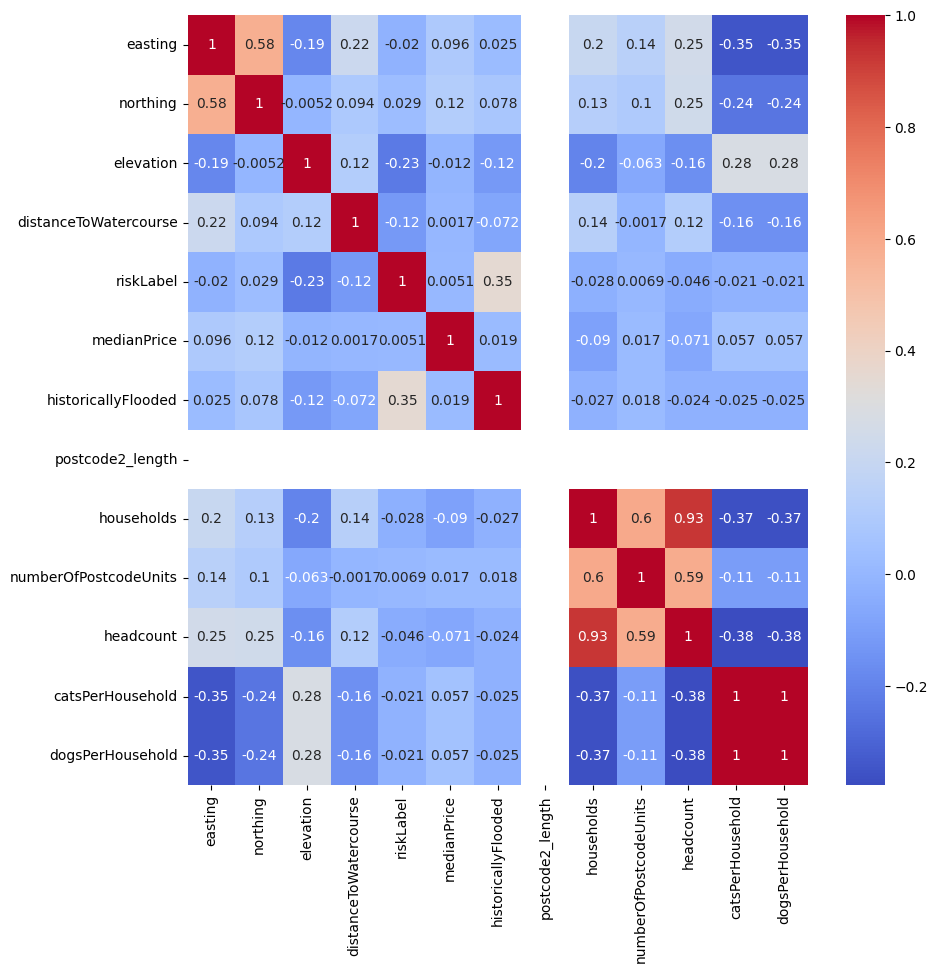

In [66]:
numberical = merged_data.select_dtypes(include=[np.number])

correlation_matrix = numberical.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=ax)

In [67]:
# sns.pairplot(data=merged_data, hue="postcodeDistrict", corner=True)

In [68]:
# Dropping headcount, cat and dogs, postcode2_length as they all have high correlations with other variables
merged_data = merged_data.drop(columns=["postcode2_length", "catsPerHousehold", "dogsPerHousehold"])

In [69]:
data['medianPrice'].describe()

count    7.379800e+04
mean     5.141523e+05
std      9.093642e+05
min      1.000000e+02
25%      2.924000e+05
50%      3.984000e+05
75%      5.649750e+05
max      6.540120e+07
Name: medianPrice, dtype: float64

In [70]:
# num_bins =10   # 分4箱
bins = [100, 1000, 10000, 100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,7000000]  
labels = ['100-1000','1000-10000','10000-100000','100000-200000','200000-300000','300000-400000','400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000','1000000-7000000']

data['price_bin'] = pd.cut(data['medianPrice'], bins=bins, labels=labels, include_lowest=True)
data.head()
# sns.pairplot(data=data, hue="price_bin", corner=True)


,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode,postcode2_length,postcodeSector,price_bin
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL,3,BA1 1,600000-700000
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN,3,BA1 1,500000-600000
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR,3,BA1 1,500000-600000
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG,3,BA1 1,500000-600000
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH,3,BA1 1,500000-600000


In [71]:
# sns.pairplot(data=data, hue="price_bin", corner=True)

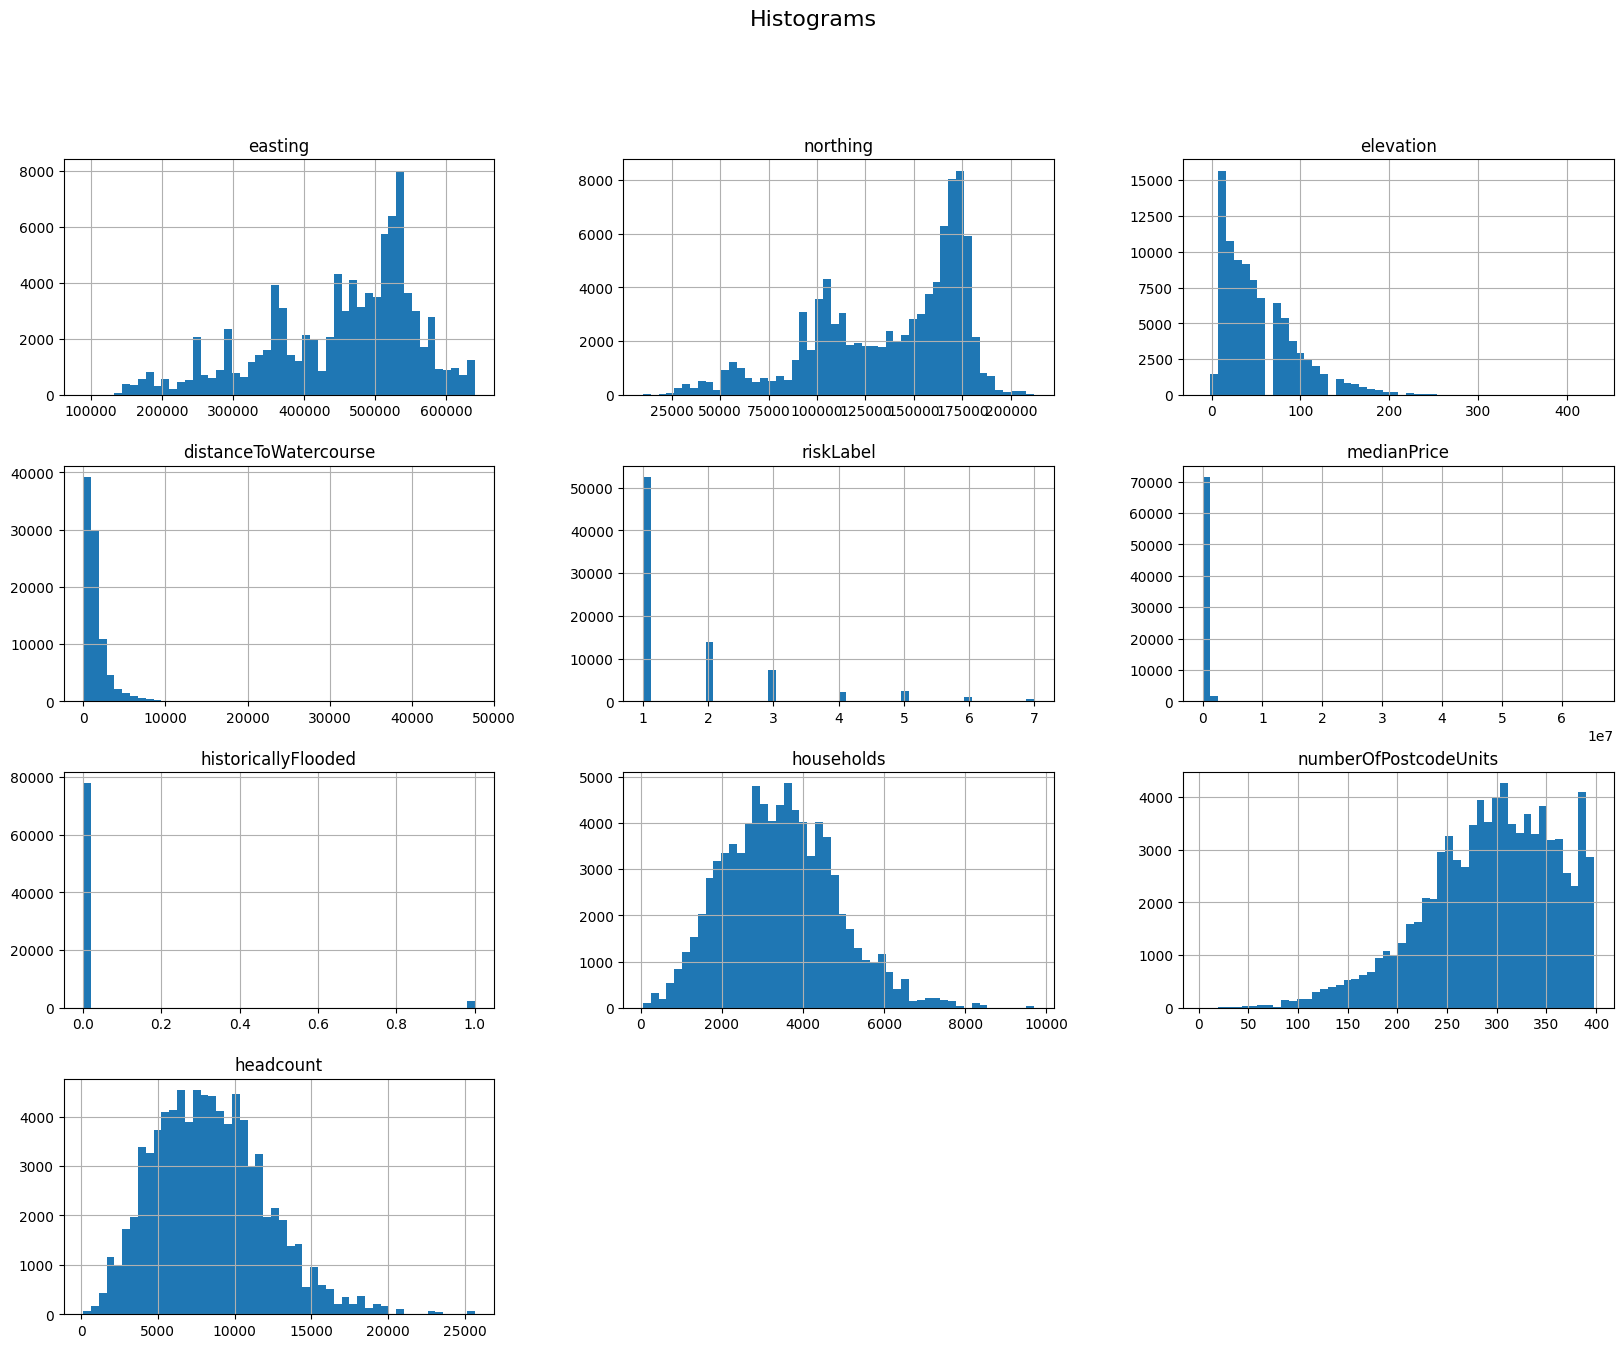

In [72]:
#  Histograms of numerical data
merged_data.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms', fontsize=16)
plt.show()

In [73]:
# Adding historcallFlooded to categorical 
numerical_columns = merged_data.select_dtypes(include=[np.number]).columns
numerical_columns = numerical_columns.drop('medianPrice, historicallyFlooded, riskLabel'.split(', '))
numerical_columns

Index(['easting', 'northing', 'elevation', 'distanceToWatercourse',
       'households', 'numberOfPostcodeUnits', 'headcount'],
      dtype='object')

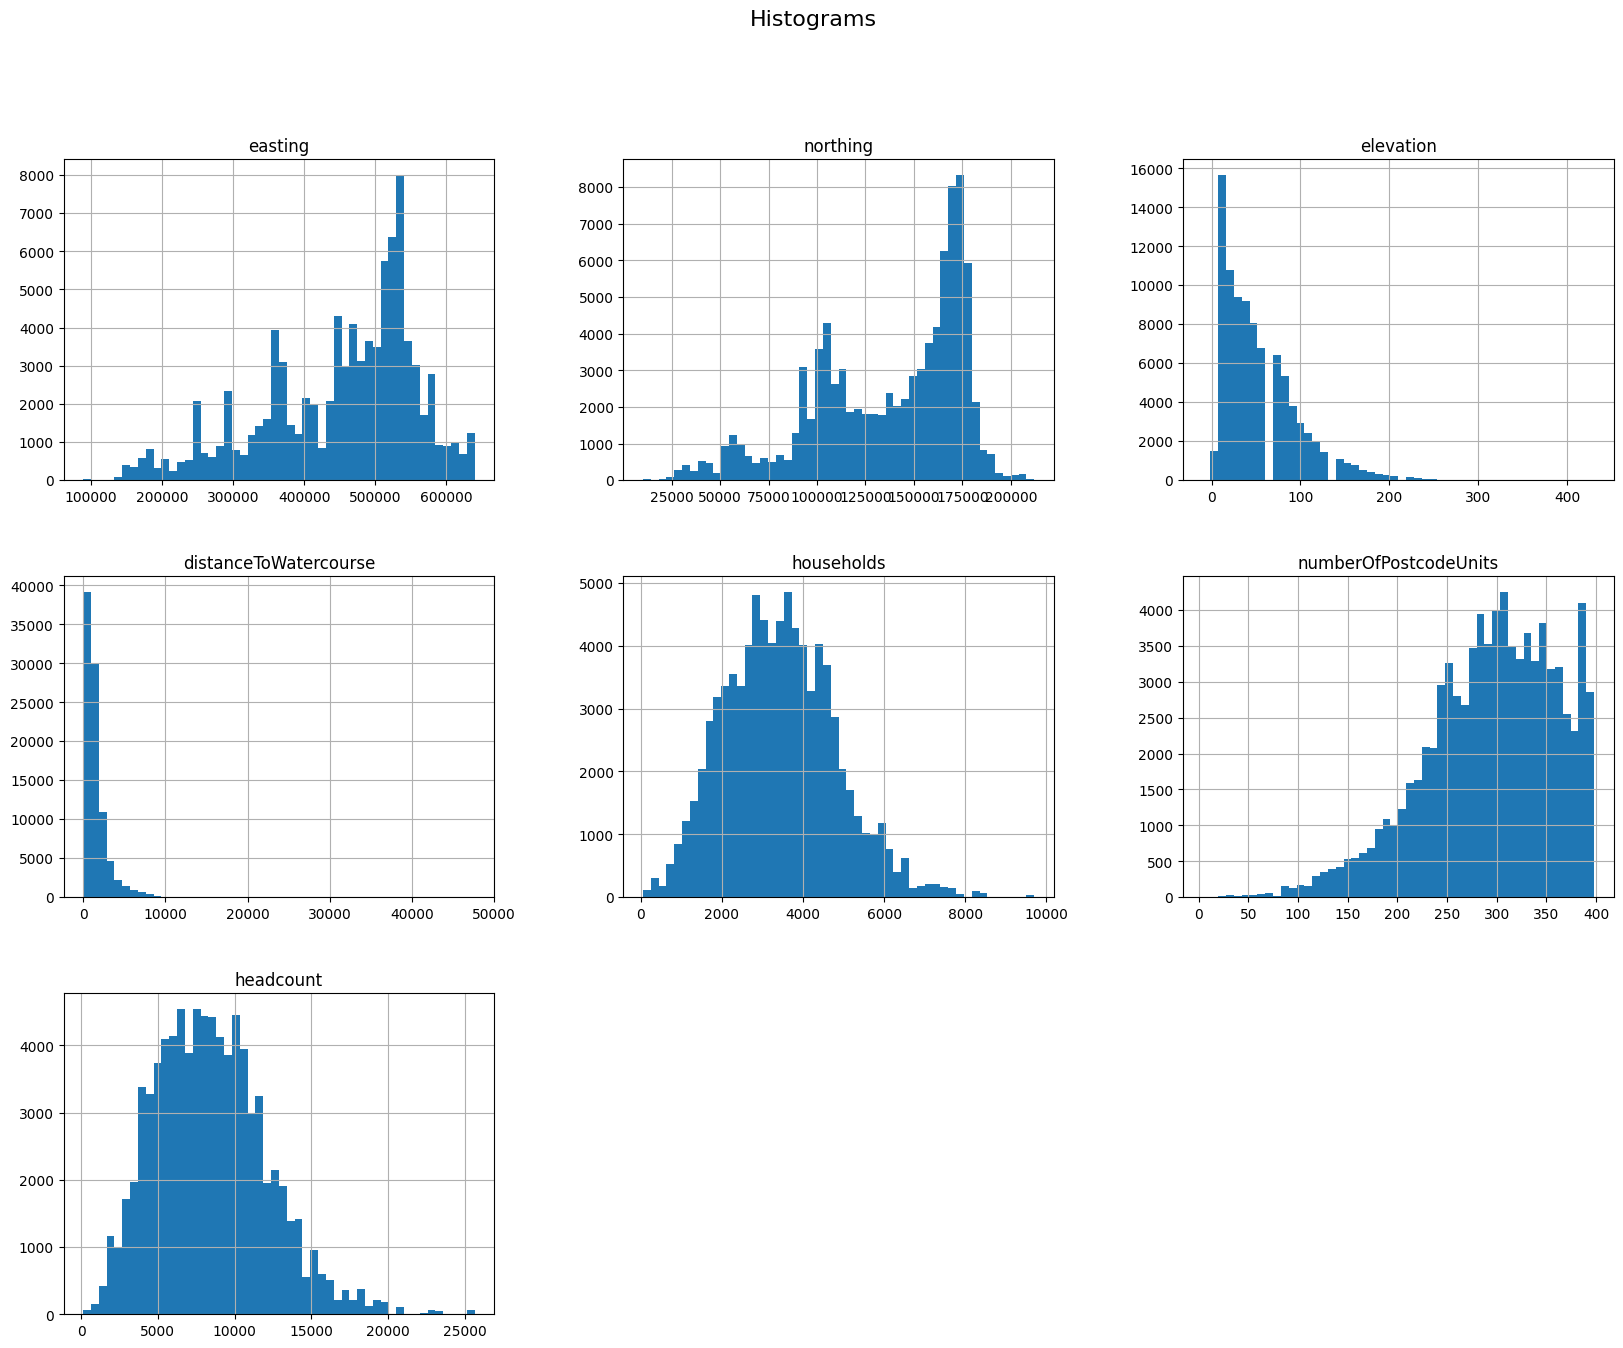

In [74]:
# producing another histogram
merged_data[numerical_columns].hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms', fontsize=16)
plt.show()

Looking at the distributions of the histograms, households is roughly normal and therefore a standard scaler should be used.

Easting, northing, elevation, distanceToWatercourse and numberOfPostcodeUnits is skewed so a minmax scaler should be used.

In [75]:
# identify the columns with missing values of over 30%
missing_values = merged_data.isnull().mean()
missing_values = missing_values[missing_values > 0.3]
missing_values

nearestWatercourse    0.375408
dtype: float64

In [76]:
categorical_columns = merged_data[[i for i in merged_data.columns if i not in numerical_columns]]
# Dropping target features and unnecessary columns
categorical_columns = categorical_columns.drop(columns=['postcode', 'medianPrice', 'postcodeDistrict', 'postcodeSector', 'incode','', "nearestWatercourse", "riskLabel", "historicallyFlooded"])
categorical_columns

,soilType,localAuthority
0,Unsurveyed/Urban,Bath and North East Somerset
1,Unsurveyed/Urban,Bath and North East Somerset
2,Unsurveyed/Urban,Bath and North East Somerset
3,Unsurveyed/Urban,Bath and North East Somerset
4,Unsurveyed/Urban,Bath and North East Somerset
...,...,...
90992,Unsurveyed/Urban,Eastbourne
90993,Unsurveyed/Urban,Epsom and Ewell
90994,Unsurveyed/Urban,Brighton and Hove
90995,NaN,Dorset


In [77]:
merged_data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode,postcodeSector,households,numberOfPostcodeUnits,headcount,
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL,BA1 1,1072.0,354.0,1987.0,BA1
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN,BA1 1,1072.0,354.0,1987.0,BA1
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR,BA1 1,1072.0,354.0,1987.0,BA1
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG,BA1 1,1072.0,354.0,1987.0,BA1
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH,BA1 1,1072.0,354.0,1987.0,BA1


In [78]:
# Merging headcounts with the merged_data
merged_data = pd.merge(merged_data, headcounts, on='postcodeDistrict', how='left')

merged_data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode,postcodeSector,households,numberOfPostcodeUnits,headcount_x,,headcount_y
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL,BA1 1,1072.0,354.0,1987.0,BA1,NaN
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN,BA1 1,1072.0,354.0,1987.0,BA1,NaN
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR,BA1 1,1072.0,354.0,1987.0,BA1,NaN
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG,BA1 1,1072.0,354.0,1987.0,BA1,NaN
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH,BA1 1,1072.0,354.0,1987.0,BA1,NaN


In [79]:
headcounts['postcodeDistrict'].value_counts()

postcodeDistrict
YO8     1
AL1     1
AL10    1
AL2     1
AL3     1
       ..
B12     1
B11     1
B10     1
B1      1
AL9     1
Name: count, Length: 2297, dtype: int64

In [80]:
merged_data["postcodeDistrict"].value_counts()

postcodeDistrict
CR0     502
SO4     469
RG12    430
SL6     426
SE1     411
       ... 
SW1Y      1
UB5       1
TR25      1
BN88      1
TR93      1
Name: count, Length: 707, dtype: int64

In [81]:
# Checking for missing values
missing_values = merged_data.isnull().mean()
missing_values

postcode                 0.000000
easting                  0.000000
northing                 0.000000
soilType                 0.003528
elevation                0.003594
nearestWatercourse       0.375408
distanceToWatercourse    0.003637
localAuthority           0.003484
riskLabel                0.120850
medianPrice              0.189006
historicallyFlooded      0.120850
postcodeDistrict         0.000000
incode                   0.000000
postcodeSector           0.000000
households               0.087959
numberOfPostcodeUnits    0.087959
headcount_x              0.087959
                         0.048760
headcount_y              0.443146
dtype: float64

In [82]:
# # Plotting easting, northing with the colour of headcount
# plt.scatter(merged_data['easting'], merged_data['northing'], c=merged_data['headcount'])
# # Plotting nan values as red
# # plt.scatter(merged_data['easting'][merged_data['headcount'].isnull()],merged_data['northing'][merged_data['headcount'].isnull()], c='red')
# plt.xlabel('Easting')
# plt.ylabel('Northing')
# plt.title('Easting vs Northing')
# plt.colorbar()
# plt.show()

NaN values to be assumed to be that no one lives there. 

In [83]:
# Producing a histogram for headcounts
# merged_data['headcount'].hist(bins=50)

Showing skewed dataset, minmax scaler will be used.

In [84]:
# #printing numerical columns
# numerical = X_train.select_dtypes(include=[np.number])
# numerical.columns

In [85]:
# # columns_to_drop = ['postcode', 'postcodeDistrict', 'postcodeSector', 'incode', 'nearestWatercourse', 'localAuthority', '', 'catsPerHousehold', 'dogsPerHousehold', 'postcode2_length']
# # X_train = X_train.drop(columns=columns_to_drop)
# X_train.head()

In [86]:
from sklearn.neighbors import NearestNeighbors
# Takes input of number of suspects charged per policing area and the postcode data 
# Returns the number of suspects charged in each district appended to the postcode dataset
def postcode_nearest_station(policeArea, postcode):
    #define a knn model 
    knn_model = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
    
    #
    policeArea_coords = policeArea[['Latitude', 'Longitude']].values
    postcode_coords = postcode[['latitude', 'longitude']].values

    #
    knn_model.fit(policeArea_coords)

    #find the nearest policearea to each postcode
    distances, indices = knn_model.kneighbors(postcode_coords)
    print(distances.max())


    # 将最近 station 的信息添加到 postcode DataFrame
    postcode['nearest_policearea'] = policeArea.iloc[indices[:, 0]]['Reported by'].values
    postcode['Suspect Charged'] = policeArea.iloc[indices[:, 0]]['Suspect Charged'].values
    

    return postcode

In [87]:
merged_data

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,postcodeDistrict,incode,postcodeSector,households,numberOfPostcodeUnits,headcount_x,,headcount_y
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,1.0,BA1,1AL,BA1 1,1072.0,354.0,1987.0,BA1,NaN
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,0.0,BA1,1AN,BA1 1,1072.0,354.0,1987.0,BA1,NaN
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,1.0,BA1,1AR,BA1 1,1072.0,354.0,1987.0,BA1,NaN
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,0.0,BA1,1BG,BA1 1,1072.0,354.0,1987.0,BA1,NaN
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,0.0,BA1,1BH,BA1 1,1072.0,354.0,1987.0,BA1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90992,BN21 4DE,559875,99669,Unsurveyed/Urban,NaN,NaN,NaN,Eastbourne,NaN,NaN,NaN,BN21,4DE,BN21 4,2614.0,321.0,4128.0,BN21,26746.0
90993,KT18 5BA,520934,160353,Unsurveyed/Urban,50.0,NaN,1710.0,Epsom and Ewell,NaN,NaN,NaN,KT18,5BA,KT18 5,3436.0,310.0,8119.0,KT18,17430.0
90994,BN50 9XQ,531040,104624,Unsurveyed/Urban,30.0,NaN,NaN,Brighton and Hove,NaN,NaN,NaN,BN50,9XQ,BN50 9,NaN,NaN,NaN,BN50,NaN
90995,BH22 8SG,408515,98030,NaN,20.0,NaN,950.0,Dorset,NaN,NaN,NaN,BH22,8SG,BH22 8,4846.0,316.0,10783.0,BH22,29851.0


In [88]:
crime_data = pd.read_csv("../flood_tool/resources/thinned_crime_data.csv")

suspects_charged = crime_data.groupby('Reported by').agg({'Suspect Charged': 'sum', 'Longitude': 'mean', 'Latitude': 'mean'}).reset_index()
suspects_charged = suspects_charged.sort_values(by='Suspect Charged', ascending=False)


import flood_tool as ft
merged_data['latitude'], merged_data['longitude'] = ft.geo.get_gps_lat_long_from_easting_northing(
    merged_data['easting'], merged_data['northing']
)

merged_data = postcode_nearest_station(suspects_charged, merged_data)
merged_data.head()

2.2434754875901053


,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,...,postcodeSector,households,numberOfPostcodeUnits,headcount_x,,headcount_y,latitude,longitude,nearest_policearea,Suspect Charged
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,...,BA1 1,1072.0,354.0,1987.0,BA1,NaN,51.379625,-2.363284,Avon and Somerset Constabulary,964
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,...,BA1 1,1072.0,354.0,1987.0,BA1,NaN,51.379000,-2.358926,Avon and Somerset Constabulary,964
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,...,BA1 1,1072.0,354.0,1987.0,BA1,NaN,51.378585,-2.359282,Avon and Somerset Constabulary,964
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,...,BA1 1,1072.0,354.0,1987.0,BA1,NaN,51.383215,-2.359763,Avon and Somerset Constabulary,964
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,...,BA1 1,1072.0,354.0,1987.0,BA1,NaN,51.382862,-2.360321,Avon and Somerset Constabulary,964


In [89]:
# Replacing soilType with other physical properties
soiltypes = pd.read_csv("../flood_tool/resources/soil_details.csv")
soiltypes.head()

,soilType,Porosity Min(%),Porosity Max(%),Porosity Mean(%),Permeability category,Permeability Max(m�),Permeability Min(m�),Permeability mean(m�),Description,Bulk Density Min (g/cm�),Bulk Density Max (g/cm�),PSD min(mm),PSD max(mm),Organic soil,**Notes**
0,Unsurveyed/Urban,10,40,25.0,Highly variable,0.010000,1.000000e-09,5.000001e-03,"mixed gravel, sand, clay",1.5,2.0,0.002,10.00,0,"Mixed materials (e.g., sand, gravel, clay); d..."
1,Cambisols,35,55,45.0,Moderate to low,0.001000,1.000000e-06,5.005000e-04,"silt, sand",1.2,1.6,0.002,2.00,0,"Young soils with variable textures (loamy, si..."
2,Luvisols,30,45,37.5,Low to very low,0.000010,1.000000e-08,5.005000e-06,"clay, fine silt",1.3,1.6,0.002,0.05,0,Clay-enriched layers impede water movement. ...
3,Arenosols,35,50,42.5,High to very high,0.010000,1.000000e-05,5.005000e-03,sand,1.2,1.5,0.050,2.00,0,Sandy soils allow high permeability; low wate...
4,Leptosols,10,30,20.0,Low to very low,0.000001,1.000000e-09,5.005000e-07,"gravel, rock fragments",1.3,1.8,0.002,10.00,0,Shallow soils over rock; often gravelly or ro...


In [90]:
# Merging soiltypes with the merged_data
merged_data = pd.merge(merged_data, soiltypes, on='soilType', how='left')
merged_data.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,...,Permeability Max(m�),Permeability Min(m�),Permeability mean(m�),Description,Bulk Density Min (g/cm�),Bulk Density Max (g/cm�),PSD min(mm),PSD max(mm),Organic soil,**Notes**
0,BA1 1AL,374813,164571,Unsurveyed/Urban,20.0,River Avon,1240.0,Bath and North East Somerset,5.0,621800.0,...,0.01,1.000000e-09,0.005,"mixed gravel, sand, clay",1.5,2.0,0.002,10.0,0.0,"Mixed materials (e.g., sand, gravel, clay); d..."
1,BA1 1AN,375116,164500,Unsurveyed/Urban,20.0,River Avon,1550.0,Bath and North East Somerset,3.0,577900.0,...,0.01,1.000000e-09,0.005,"mixed gravel, sand, clay",1.5,2.0,0.002,10.0,0.0,"Mixed materials (e.g., sand, gravel, clay); d..."
2,BA1 1AR,375091,164454,Unsurveyed/Urban,20.0,River Avon,1540.0,Bath and North East Somerset,5.0,533300.0,...,0.01,1.000000e-09,0.005,"mixed gravel, sand, clay",1.5,2.0,0.002,10.0,0.0,"Mixed materials (e.g., sand, gravel, clay); d..."
3,BA1 1BG,375060,164969,Unsurveyed/Urban,30.0,River Avon,1450.0,Bath and North East Somerset,1.0,563600.0,...,0.01,1.000000e-09,0.005,"mixed gravel, sand, clay",1.5,2.0,0.002,10.0,0.0,"Mixed materials (e.g., sand, gravel, clay); d..."
4,BA1 1BH,375021,164930,Unsurveyed/Urban,30.0,River Avon,1410.0,Bath and North East Somerset,1.0,570800.0,...,0.01,1.000000e-09,0.005,"mixed gravel, sand, clay",1.5,2.0,0.002,10.0,0.0,"Mixed materials (e.g., sand, gravel, clay); d..."


In [91]:
# Checking for missing values
missing_values = merged_data.isnull().mean()
missing_values

postcode                                                                       0.000000
easting                                                                        0.000000
northing                                                                       0.000000
soilType                                                                       0.003528
elevation                                                                      0.003594
nearestWatercourse                                                             0.375408
distanceToWatercourse                                                          0.003637
localAuthority                                                                 0.003484
riskLabel                                                                      0.120850
medianPrice                                                                    0.189006
historicallyFlooded                                                            0.120850
postcodeDistrict                

In [92]:
#High correlation that should drop
df_merged = merged_data.drop(columns=['Porosity Min(%)','Porosity Mean(%)','PSD max(mm)','Bulk Density Min (g/cm³)','Bulk Density Max (g/cm³)','Permeability mean(m²)'], inplace=True)

KeyError: "['Bulk Density Min (g/cm³)', 'Bulk Density Max (g/cm³)', 'Permeability mean(m²)'] not found in axis"

In [ ]:
# # Creating correlation heatmap with median price
# numerical = merged_data.select_dtypes(include=[np.number])

# # Adding median price to the numerical columns
# numerical['medianPrice'] = y_train

# correlation_matrix = numerical.corr()
# fig, ax = plt.subplots(figsize=(20, 20))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", ax=ax)

In [ ]:
numerical_columns = ['easting', 'northing', 'elevation', 'distanceToWatercourse', 'numberOfPostcodeUnits', 'households', 'Porosity Max(%)', 'Permeability Max(m²)', 'Permeability Min(m²)', 'PSD min(mm)', 'Organic soil', 'Suspect Charged', 'headcount']
categorical_columns = ['soilType', 'localAuthority']

# keeping only the numerical columns and categorical columns
X = merged_data[numerical_columns + categorical_columns]
y = merged_data['medianPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
_, X_val, _, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

X

KeyError: "['headcount'] not in index"

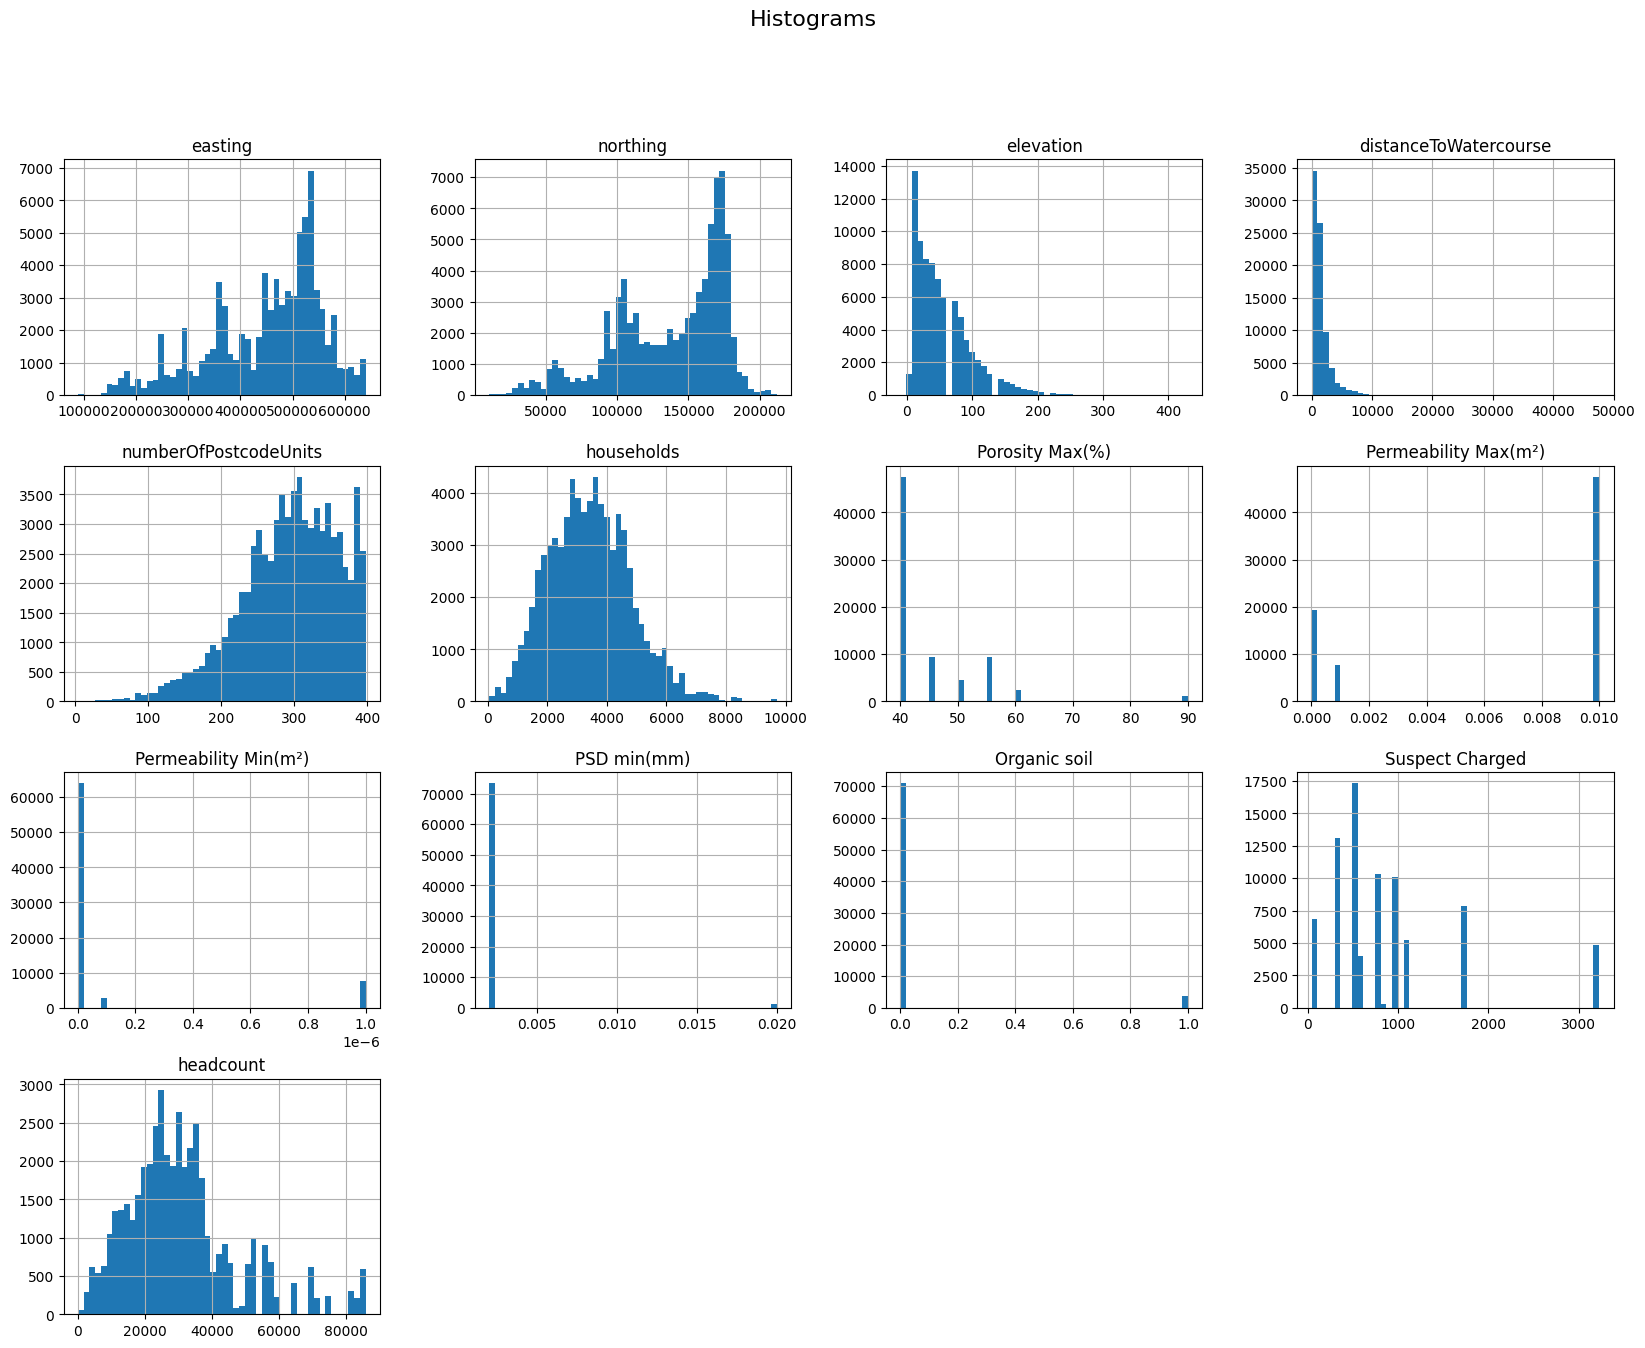

In [ ]:
# Histrogram of the numerical columns
X.hist(bins=50, figsize=(20, 15))
plt.suptitle('Histograms', fontsize=16)
plt.show()

Local authority should be label encoded, but the rest can be one hot encoded.

In [ ]:
# creating pipeline to preprocess the data
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer


# Preprocessing for numerical data
# Using standard scaler for households
normal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Using minmax scaler for the other numerical data
minmax_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('minmax', MinMaxScaler())])

# Using minmax scaler and impute with 0 for headcount
minmax_transformer_headcount = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('minmax', MinMaxScaler())])

# Preprocessing for categorical data
onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

# Bundle preprocessing for numerical and categorical data

preprocessor = ColumnTransformer(
    transformers=[
        ('standard', normal_transformer, ['households']),
        ('minmax', minmax_transformer, ['easting', 'northing', 'elevation', 'distanceToWatercourse', "numberOfPostcodeUnits", 'Porosity Max(%)', 'Permeability Max(m²)', 'Permeability Min(m²)', 'PSD min(mm)', 'Organic soil', 'Suspect Charged']),
        ('minmax_headcount', minmax_transformer_headcount, ['headcount']),
        ('onehot', onehot_transformer, ['soilType', "localAuthority" ]),
    ])
preprocessor

ColumnTransformer(transformers=[('standard',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['households']),
                                ('minmax',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('minmax', MinMaxScaler())]),
                                 ['easting', 'northing', 'elevation',
                                  'distanceToWatercourse',
                                  'numberOfPostcodeUnits', 'Porosity Max(%)',
                                  'Permeability Max(m²)',
                                  'Permeability...
                                  'Organic soil', 'Suspect Charged']),
                                ('minmax_headcount',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('minmax', MinMaxScaler())]),
                                 ['headcount']),
                                ('onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['soilType', 'localAuthority'])])

In [ ]:
# 2. Define the model for random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
rf_median_houseprice_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf)
                             ])

rf_median_houseprice_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['households']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['easting', 'northing',
                                                   'elevation',
                                                   'distanceToWatercourse',
                                                   'numberOfPostcodeUnits',
                                                   'Porosity Max(%)',
                                                   'Pe...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['headcount']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['soilType',
                                                   'localAuthority'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Testing linear regression models on the data
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Regression models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

# Bundle preprocessing and modeling code in a pipeline
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', linear)
                             ])

ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', ridge)
                             ])

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', lasso)
                             ])

elastic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', elastic)
                             ])

In [ ]:
# Impute NaN values in y_train
y_train = y_train.to_numpy().reshape(-1, 1)
imputer = SimpleImputer(strategy='mean')
y_train = imputer.fit_transform(y_train).ravel()

# Impute NaN values in y_test
y_test = y_test.to_numpy().reshape(-1, 1)
y_test = imputer.fit_transform(y_test).ravel()

# Impute NaN values in y_val
y_val = y_val.to_numpy().reshape(-1, 1)
y_val = imputer.fit_transform(y_val).ravel()

In [ ]:
# Using gridsearch to find the best parameters for the models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
# Linear regression
param_grid = {
    'model__fit_intercept': [True, False]}

linear_search = GridSearchCV(linear_pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
linear_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", linear_search.best_params_)
print("Best score found: ", linear_search.best_score_)

Best parameters found:  {'model__fit_intercept': True}
Best score found:  0.06477706726300014


In [ ]:
def perform_grid_search(X_train, y_train, param_grid, model):
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='r2')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best score found: ", grid_search.best_score_)

    return grid_search


In [ ]:
def perform_random_search(X_train, y_train, param_grid, model):
    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Create the GridSearchCV object
    rand_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, cv=5, scoring='r2')

    # Fit the grid search to the data
    rand_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best parameters found: ", rand_search.best_params_)
    print("Best score found: ", rand_search.best_score_)

    return rand_search


In [ ]:
# # Linear regression using function
# param_grid = {
#     'model__fit_intercept': [True, False]}

# linear_search = perform_grid_search(X_train, y_train, param_grid, linear)

Best parameters found:  {'model__fit_intercept': True}
Best score found:  0.06480651729755427


In [ ]:
# # Ridge regression
# param_grid = {
#     'model__alpha': [0.1, 1, 10],
#     'model__fit_intercept': [True, False]}

# ridge_search = perform_grid_search(X_train, y_train, param_grid, ridge)

Best parameters found:  {'model__alpha': 10, 'model__fit_intercept': False}
Best score found:  0.06489038088972388


In [ ]:
# # Lasso regression
# param_grid = {
#     'model__alpha': [0.1, 1, 10],
#     'model__fit_intercept': [True, False]}

# lasso_search = perform_random_search(X_train, y_train, param_grid, lasso)

/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
# # ElasticNet regression
# param_grid = {
#     'model__alpha': [0.1, 1, 10],
#     'model__l1_ratio': [0.1, 0.5, 0.9],
#     'model__fit_intercept': [True, False]}

# elastic_search = perform_random_search(X_train, y_train, param_grid, elastic)

Best parameters found:  {'model__alpha': 0.1, 'model__fit_intercept': True, 'model__l1_ratio': 0.9}
Best score found:  0.056200941692558556


In [ ]:
# # Random forest regression
# param_grid = {
#  'model__n_estimators': [135, 140, 145],
#  'model__min_samples_split': [3],
#  'model__min_samples_leaf': [1],
#  'model__max_features': ['sqrt'],
#  'model__max_depth': [42],
#  'model__bootstrap': [True],
#  'model__random_state': [42]
#    }

# rf_search = perform_random_search(X_val, y_val, param_grid, rf)

/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters found:  {'model__random_state': 42, 'model__n_estimators': 140, 'model__min_samples_split': 3, 'model__min_samples_leaf': 1, 'model__max_features': 'sqrt', 'model__max_depth': 42, 'model__bootstrap': True}
Best score found:  0.28107271903545383


In [ ]:
# # XGBoost regression
# from xgboost import XGBRegressor

# xgb = XGBRegressor()

# param_grid = {
#     'model__n_estimators': [100],
#     'model__max_depth': [28, 20, 25],
#     'model__learning_rate': [0.01],
#     'model__random_state': [42],
#     'model__n_jobs': [-1]
#     }

# xgb_search = perform_random_search(X_val, y_val, param_grid, xgb)

/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found:  {'model__random_state': 42, 'model__n_jobs': -1, 'model__n_estimators': 100, 'model__max_depth': 25, 'model__learning_rate': 0.01}
Best score found:  0.23342010927490345


In [ ]:
# # GBM regression
# from sklearn.ensemble import GradientBoostingRegressor

# gbm = GradientBoostingRegressor()

# param_grid = {
#     'model__n_estimators': [100, 200, 300],
#     'model__learning_rate': [0.1, 0.01, 0.001],
#     'model__subsample': [0.7, 0.8, 0.9],
#     'model__max_depth': [3, 5, 7],
#     'model__max_features': ['auto', 'sqrt', 'log2']
#     }

# gbm_search = perform_random_search(X_val, y_val, param_grid, gbm)

/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sp1720/miniconda3/envs/deluge/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/sp1720/miniconda3/envs/deluge/lib/python3

Best parameters found:  {'model__subsample': 0.9, 'model__n_estimators': 100, 'model__max_features': 'sqrt', 'model__max_depth': 5, 'model__learning_rate': 0.1}
Best score found:  0.12286010282903252


Random Forest was the best model, therefore its best parameters will be used

In [ ]:
rf_search.best_score_

np.float64(0.28107271903545383)

In [ ]:
rf_best_params = rf_search.best_params_
rf_best_params

{'model__random_state': 42,
 'model__n_estimators': 140,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 42,
 'model__bootstrap': True}

In [ ]:
# Implementing the best model for rf
rf_best_params = {
 'model__random_state': 42,
 'model__n_estimators': 140,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 1,
 'model__max_features': 'sqrt',
 'model__max_depth': 42,
 'model__bootstrap': True,
    }

rf_best = RandomForestRegressor(n_estimators=140, random_state=42, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', max_depth=42, bootstrap=True)

# Bundle preprocessing and modeling code in a pipeline
rf_best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_best)
                             ])

In [ ]:
# Implementing the best model for xgb
xgb_best_params = {
    'model__n_estimators': 100,
    'model__max_depth': 25,
    'model__learning_rate': 0.01,
    'model__random_state': 42,
    'model__n_jobs': -1
    }

xgb_best = XGBRegressor(n_estimators=100, max_depth=25, learning_rate=0.01, random_state=42, n_jobs=-1)

# Bundle preprocessing and modeling code in a pipeline
xgb_best_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', xgb_best)
                             ])

In [ ]:
# Preprocessing of validation data, get predictions
rf_best_pipeline.fit(X_train, y_train)
predictions = rf_best_pipeline.predict(X_test)

In [ ]:
# 3. Create and evaluate the pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Root Mean Squared Error: 718996.5822494554
Mean Absolute Error: 119394.39798750958
R^2 Score: 0.43930864282629745


In [ ]:
from sklearn.model_selection import cross_val_score

# Evaluate the model using cross-validation
cv_scores = cross_val_score(rf_search.best_estimator_, X_train, y_train, cv=10, scoring='r2')

Cross-validation scores:  [0.25568382 0.62725162 0.30033257 0.08334475 0.52279409 0.41407873
 0.21827202 0.31397226 0.36270768 0.06226166]
Mean cross-validation score:  0.316069919424287


In [ ]:
# Print the cross-validation scores
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation scores: ", np.std(cv_scores))
print("Minimum cross-validation score: ", np.min(cv_scores))
print("Maximum cross-validation score: ", np.max(cv_scores))

Cross-validation scores:  [0.25568382 0.62725162 0.30033257 0.08334475 0.52279409 0.41407873
 0.21827202 0.31397226 0.36270768 0.06226166]
Mean cross-validation score:  0.316069919424287
Standard deviation of cross-validation scores:  0.16834261191831168
Minimum cross-validation score:  0.06226166210481121
Maximum cross-validation score:  0.6272516157970293


In [ ]:
from sklearn.ensemble import VotingRegressor

# Create individual models with the best parameters
model1 = rf_best_pipeline
model2 = xgb_best_pipeline

# Create the ensemble model
voting_model = VotingRegressor(estimators=[('rf', model1), ('xgb', model2)])

In [ ]:
# Fit the ensemble model
voting_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('standard',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['households']),
                                                                              ('minmax',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('minmax',
                                                                                                MinMaxScaler())]),
                                                                               ['easting',
                                                                                'northing',
                                                                                'elevation',
                                                                                'distanceToWatercourse',
                                                                                'numberOfP...
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=0.01,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=25,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=100,
                                                           n_jobs=-1,
                                                           num_parallel_tree=None,
                                                           random_state=42, ...))]))])

In [ ]:
# Evaluate the ensemble model
voting_score = cross_val_score(voting_model , X_train, y_train, cv=10, scoring='r2')

Voting Regressor cross-validation scores:  [0.19746963 0.64864463 0.28472049 0.11474917 0.50689166 0.37227445
 0.19781472 0.29771347 0.35186761 0.17883074]
Mean voting regressor cross-validation score:  0.3150976577510267


In [ ]:
print("Voting Regressor cross-validation scores: ", voting_score)
print("Mean voting regressor cross-validation score: ", np.mean(voting_score))
print("Standard deviation of voting regressor cross-validation scores: ", np.std(voting_score))
print("Minimum voting regressor cross-validation score: ", np.min(voting_score))
print("Maximum voting regressor cross-validation score: ", np.max(voting_score))


print("Voting Regressor R^2 Score: ", voting_model.score(X_test, y_test))
print("Voting Regressor RMSE: ", root_mean_squared_error(y_test, voting_model.predict(X_test)))

Voting Regressor cross-validation scores:  [0.19746963 0.64864463 0.28472049 0.11474917 0.50689166 0.37227445
 0.19781472 0.29771347 0.35186761 0.17883074]
Mean voting regressor cross-validation score:  0.3150976577510267
Standard deviation of voting regressor cross-validation scores:  0.15497888504726412
Minimum voting regressor cross-validation score:  0.1147491669133055
Maximum voting regressor cross-validation score:  0.6486446267363408
Voting Regressor R^2 Score:  0.42290590298290165
Voting Regressor RMSE:  729437.7095027737


In [ ]:

unlabelled['postcodeDistrict'] = unlabelled['postcode'].str.split(' ').str[0]

In [ ]:
merged